Text is unstructured data and present in all phenomena that occur in reality. The analyzed text helps us to discover and solve many problems in the field of data science.
Natural language processing (NLP) is an area of computer science and artificial intelligence (AI) concerned with the interaction between computers and humans in natural language. The goal of NLP is to help computers understand language as well as we do.

**Applications of NLP**

Information extraction|Text generation|Text classification|Text clustering
--:|:--:|:--:|:--
Name entity recognition|Writing suggestion|Spam filtering|Topic clustering
Job information extraction|Summarization|Document classification
Sentiment extraction|Chatbot|Social listening
Keyword extraction|News generation|Recommendation

*NLTK (Natural Language Toolkit)* is a leading platform for building Python programs to work with human language data. It contains a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning. Best of all, NLTK is a free, open source, community-driven project.

# 1. Lexical analysis
By wikipedia, lexical analysis is the process of converting a sequence of characters into a sequence of tokens (strings with an assigned and thus identified meaning). A program that performs lexical analysis may be termed a lexer or tokenizer. A lexer is the first step of NLP project that its output is the input of parsing process - helping the parsing more easier.

<img src='image/lexical.png'>

## 1.1 Regex 

Some string processing techniques with regex was introduce in `2. [python] Classes`. Therefore, below will only introduce some common patterns in text processing

In [18]:
import re

In [19]:
# find special characters
pattern ='[^aàảãáạăằẳẵắặâầẩẫấậbcdđeèẻẽéẹêềểễếệfghiìỉĩíịjklmnoòỏõóọôồổỗốộơờởỡớợpqrstuùủũúụưừửữứựvwxyỳỷỹýỵz\s]'
string = """🔥𝑩𝑨𝑪𝑲 𝑻𝑶 𝑺𝑪𝑯𝑶𝑶𝑳 balo Japan classic™   balo đi học  balo laptop   balo thời trang   balo chống nước
💃 đầm trắng nữ cổ vuông eo chun váy nữ cộc tay chất đũi dáng xòe
🪵có sẵn set áo babydoll thô đũi viền ren kèm quần đùi 🪵
【JN】heybig spring and summer new Korean
🌈𝗡𝗘𝗪 𝗔𝗥𝗥𝗜𝗩𝗔𝗟💢 áo khoác kaki unisex 📽️ videoảnh thật a92
Quần jean nam trơn màu xanh 🔵 𝐅𝐑𝐄𝐄 𝐒𝐇𝐈𝐏 🔵 quần bò nam co giãn thời trang hpfashion"""

print(re.findall(pattern,string))

['🔥', '𝑩', '𝑨', '𝑪', '𝑲', '𝑻', '𝑶', '𝑺', '𝑪', '𝑯', '𝑶', '𝑶', '𝑳', 'J', '™', '💃', '\U0001fab5', '\U0001fab5', '【', 'J', 'N', '】', 'K', '🌈', '𝗡', '𝗘', '𝗪', '𝗔', '𝗥', '𝗥', '𝗜', '𝗩', '𝗔', '𝗟', '💢', '📽', '️', '9', '2', 'Q', '🔵', '𝐅', '𝐑', '𝐄', '𝐄', '𝐒', '𝐇', '𝐈', '𝐏', '🔵']


In [20]:
# Find stop word
pattern = '(^|\s+)(\S(\s+|$))+'
sen = 'I need a doctor'

re.findall(pattern, sen)

[('', 'I ', ' '), (' ', 'a ', ' ')]

In [21]:
# find url link
pattern = 'http\S+'
sen = 'Reference: https://regex101.com/ (regex online checking)'

re.findall(pattern, sen)

['https://regex101.com/']

In [30]:
# find number of episol
# pattern = '(?<=phần\s|tập\s|t|t.)\d+'
# sen = """thiên thần 1001 tập 19 
# thiên thần 1001 tập 18 
# phim trung quốc: hán sở tranh hùng-t.85 
# phim trung quốc: hán sở tranh hùng-t86 
# vụ án ngay bên bạn: bộ hài cốt bí ẩn-phần 7"""

# re.findall(pattern, sen)

In [23]:
# find sub domain of url
pattern = '(?<=//)\S+(?=\.)'
sen = """https://www.google.ca/
https://id.zalo.me/account/outapp"""

re.findall(pattern, sen)

['www.google', 'id.zalo']

In [33]:
# find item id in a url
pattern = '\d+(?=rf\d+|\.htm)'
url1 = 'https://soha.vn/giam-doc-bv-bach-mai-nguyen-quang-tuan-bi-khoi-to-bo-y-te-noi-gi-20211021185707803.htm'
url2 = 'https://soha.vn/phu-tho-ghi-nhan-them-17-ca-duong-tinh-voi-sars-cov-2-20211021121219895rf20211021185707803.htm'
re.findall(pattern, url1)
re.findall(pattern, url2)

['20211021121219895', '20211021185707803']

## 1.2 Tokenizing


Tokenization is a way of separating a piece of text into smaller units called tokens. Here, tokens can be either words, characters, or subwords. Tokenization is important process because it provide the input for all SOTA model in NLP at token level.
For example, consider the sentence: “Never give up”. The most common way of forming tokens is based on space. Assuming space as a delimiter, the tokenization of the sentence results in 3 tokens – *Never-give-up*. 

In [34]:
import nltk
import re
from nltk import word_tokenize, sent_tokenize, wordpunct_tokenize, RegexpTokenizer

### Sentences tokenization

Sentences tokenize using pre-trained model from `PunktSentenceTokenizer` in NLTK to divide a text into a list of sentences based on recognizing words which start sentences and finding sentence boundaries.

*Reference*: [Punkt documentation](https://www.nltk.org/_modules/nltk/tokenize/punkt.html)

In [20]:
text = """There are different methods and libraries available to perform tokenization!
NLTK, Gensim, Keras are some of the libraries that can be used to accomplish the task.
"""

sent_tokenize(text)

['There are different methods and libraries available to perform tokenization!',
 'NLTK, Gensim, Keras are some of the libraries that can be used to accomplish the task.']

In [19]:
text = """Punkt knows that the periods in Mr. Smith and Johann S. Bach do not mark sentence boundaries.  
And sometimes sentences can start with non-capitalized words.  i is a good variable name.
"""

sent_tokenize(text)

['Punkt knows that the periods in Mr. Smith and Johann S. Bach do not mark sentence boundaries.',
 'And sometimes sentences can start with non-capitalized words.',
 'i is a good variable name.']

### Word tokenization
Word tokenization is the most commonly used tokenization algorithm. It splits a piece of text into individual words based on a certain delimiter (whitespace, puntuation). Depending upon delimiters, different word-level tokens are formed.

In NLTK, there are three function `word_tokenize`- is based on a `TreebankWordTokenizer` and `wordpunct_tokenize` is based on a simple regexp tokenization. `wordpunct_tokenize` will split all special symbols and treat them as separate units. `word_tokenize` on the other hand keeps things like single quote together. The last function is `RegexpTokenizer` - using regex to tokenize sentences.

In [13]:
text = """NLTK, spacy,tokenizer are popular library in text mining"""

print(word_tokenize(text))

['NLTK', ',', 'spacy', ',', 'tokenizer', 'are', 'popular', 'library', 'in', 'text', 'mining']


In [36]:
text = """The sentence 'I won' can be tokenized into two word-tokens 'I' and 'won'. 
There's a different between word and wordpunct function!"""

print(word_tokenize(text))

['The', 'sentence', "'", 'I', 'won', "'", 'can', 'be', 'tokenized', 'into', 'two', 'word-tokens', "'", 'I', "'", 'and', "'won", "'", '.', 'There', "'s", 'a', 'different', 'between', 'word', 'and', 'wordpunct', 'function', '!']


In [37]:
text = """The sentence 'I won' can be tokenized into two word-tokens 'I' and 'won'. 
There's a different between word and wordpunct function!"""

print(wordpunct_tokenize(text))

['The', 'sentence', "'", 'I', 'won', "'", 'can', 'be', 'tokenized', 'into', 'two', 'word', '-', 'tokens', "'", 'I', "'", 'and', "'", 'won', "'.", 'There', "'", 's', 'a', 'different', 'between', 'word', 'and', 'wordpunct', 'function', '!']


In [35]:
text = """The sentence 'I won' can be tokenized into two word-tokens 'I' and 'won'. 
There's a different between word and wordpunct function!"""

re_tokenizer = RegexpTokenizer(r'\w+')
print(re_tokenizer.tokenize(text))

['The', 'sentence', 'I', 'won', 'can', 'be', 'tokenized', 'into', 'two', 'word', 'tokens', 'I', 'and', 'won', 'There', 's', 'a', 'different', 'between', 'word', 'and', 'wordpunct', 'function']


## 1.3. Stemming
Stemming and Lemmatization are Text Normalization (or Word Normalization) techniques in the field of NLP that are used to prepare text, words, and documents for further processing. Stemming is different to Lemmatization in the approach it uses to produce root forms of words.

Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem. Stemming a word or sentence may result in words that are not actual words (word has no meaning in dictionary). Stems are created by removing the suffixes or prefixes used with a word.

In NLTK, there are two popular stemming algorithms for English: PorterStemmer and LancasterStemmer 

### PorterStemmer

This stemming algorithm is an older one. It uses suffix stripping to produce stems and does not keep a lookup table for actual stems of the word but applies algorithmic rules to generate stems. That why it sometime generate not a english word. PorterStemmer is known for its simplicity and speed.

In [14]:
from nltk.stem import PorterStemmer
from nltk import word_tokenize

In [6]:
porter = PorterStemmer()
words = ['run','runner','running','ran','runs','easily','fairly']
for word in words:
    print(word+' --> '+porter.stem(word))

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fairli


In [10]:
porter = PorterStemmer()
words = ['trouble','troubling','working','worked','friendship','friendly']
for word in words:
    print(word+' --> '+porter.stem(word))

trouble --> troubl
troubling --> troubl
working --> work
worked --> work
friendship --> friendship
friendly --> friendli


In [22]:
#stemming is not working with a sentence
sentence="Stemming is the process of producing morphological variants of a root"
porter.stem(sentence)

'stemming is the process of producing morphological variants of a root'

In [21]:
sentence="Stemming is the process of producing morphological variants of a root word"
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

print(stemSentence(sentence))

stem is the process of produc morpholog variant of a root word 


### LancasterStemmer

LancasterStemmer which is the most aggressive stemming algorithm of the bunch is an iterative algorithm with rules saved externally. One table containing about 120 rules indexed by the last letter of a suffix. One complaint around this stemming algorithm though is that it sometimes is over-stemming and can really transform words into strange stems.

In [15]:
from nltk.stem import LancasterStemmer
from nltk import word_tokenize

In [5]:
lancaster = LancasterStemmer()

words = ['run','runner','running','ran','runs','easily','fairly']
for word in words:
    print(word+' --> '+lancaster.stem(word))

run --> run
runner --> run
running --> run
ran --> ran
runs --> run
easily --> easy
fairly --> fair


In [12]:
lancaster = LancasterStemmer()
words = ['trouble','troubling','working','worked','friendship','friendly']
for word in words:
    print(word+' --> '+lancaster.stem(word))

trouble --> troubl
troubling --> troubl
working --> work
worked --> work
friendship --> friend
friendly --> friend


In [25]:
sentence="Stemming is the process of producing morphological variants of a root word"
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(lancaster.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

print(stemSentence(sentence))

stem is the process of produc morpholog vary of a root word 


## 1.4. Lemmatization

Lemmatization is similar to stemming but it brings context to the words. It links words with similar meaning to one word while stemming is just removing the surfix/prefix of word without concern to meaning of the words.

Lemmatization work best if it was provided second argument to `lemmatize()` with correct part of speech (POS) tagging.

*Part of speech constant*

Type|Sign
--:|:--:|
ADJ|`a`
ADV|`r`
Noun|`n`
Verb|`v`

In [7]:
from nltk.stem import WordNetLemmatizer  
import nltk

In [40]:
lemmatizer = WordNetLemmatizer()

words = ['easily','fairly']
for word in words:
    print(word+' --> '+lemmatizer.lemmatize(word, pos='a'))

easily --> easily
fairly --> fairly


In [41]:
lemmatizer = WordNetLemmatizer()

words_verb = ['run','runner','running','ran','runs']
for word in words_verb:
    print(word+' --> '+lemmatizer.lemmatize(word,pos='v'))

run --> run
runner --> runner
running --> run
ran --> run
runs --> run


In [22]:
lemmatizer = WordNetLemmatizer()

words_noun = ['feet','teeth','bats','mice','cookies']
for word in words_noun:
    print(word+' --> '+lemmatizer.lemmatize(word, pos='n'))

feet --> foot
teeth --> teeth
bats --> bat
mice --> mouse
cookies --> cooky


## 1.5. Removing stop word 

Removing stop word is a step in pre-processing text data. A stop word is a commonly used word (such as *the, a, an, in*) that a search engine has been programmed to ignore because they usually bring very litle userful information. Here are a few key benefits of removing stopwords:

- On removing stopwords, dataset size decreases and the time to train the model decreases and the accuracy of classification will be increase 
- Even search engines like Google remove stopwords for fast and relevant retrieval of data from the database.
- It suitable for text classification and text generation

But removing stop word is not suitable for text summarization and machine translation

In [47]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [46]:
stopwords.words('english')[:5]

['i', 'me', 'my', 'myself', 'we']

In [49]:
stop_words = set(stopwords.words('english'))

sentence = """The process of converting data to something a computer can understand 
is referred to as pre-processing""" 
word_tokens = word_tokenize(sentence)
 
remove_sw = [i for i in word_tokens if i.lower() not in stop_words]

In [50]:
remove_sw

['process',
 'converting',
 'data',
 'something',
 'computer',
 'understand',
 'referred',
 'pre-processing']

# 2. Vectorizing

Machine Learning algorithms requires numeric input and do not process the string or raw text. To convert the text data into numerical data, there is a method which are known as vectorization, or Word embeddings.

## 2.1. Bag of word (BoW)

A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

1. A vocabulary of words.
2. A measure of the presence of words.

Any information about the order or structure of words in the document is discarded. BOW is only concerned with whether  words occur in the document. In the simple way, BOW collect all unique token from a document and each sentence will be vectorize by counting each word in BOW.

Bow is simple to implement but it don't concern with ordered of word and if the document is very large then the length vector will increase that can lead to sparse matrix


In [1]:
import nltk
import re
import numpy as np
from nltk import word_tokenize, RegexpTokenizer
from nltk.stem import LancasterStemmer

In [2]:
corpus = [
    "The elephant sneezed at the sight of potatoes.",
    "Bats can see via echolocation. See the bat sight sneeze!",
    "Wondering, she opened the door to the studio.",
]

In [15]:
lancaster =LancasterStemmer()
re_tokenizer = RegexpTokenizer(r'\w+')

def tokenize(sentence):
    alltoken = []
    sen = sentence.lower()
    tokens = re_tokenizer.tokenize(sen)
    for token in tokens:
        new_token = lancaster.stem(token)
        alltoken.append(token)
    return alltoken

In [47]:
bow=[]
for s in corpus:
    w = tokenize(s)
    bow+=w
bow=set(bow)

In [48]:
def vectorize(tokens):
    vector=[]
    for w in bow:
        vector.append(tokens.count(w))
    return vector

In [57]:
for i in range (len(corpus)):
    vector = vectorize(tokenize(corpus[i]))
    print(vector)

[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 0]
[0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 1]
[0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0]


*Another way to create BoW with Sklearn*

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
 
sentence_1=corpus[0]
sentence_2=corpus[1]
sentence_3=corpus[2]
 
CountVec = CountVectorizer(stop_words='english')
#transform
count_data = CountVec.fit_transform([sentence_1,sentence_2,sentence_3])
 
count_data.toarray()

array([[0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1]], dtype=int64)

## 2.2. Term frequency-inverse document frequency (TF-IDF)

If a word occurs many times in a document but also along with many other documents in a dataset, maybe it is because this word is just a frequent word, not because it is relevant or meaningful. One approach of TF-IDF is to rescale the frequency of words by how often they appear in all documents so the scores for frequent words like *the* which are also frequent across all documents are penalized. It divided to two process:

*1. Term frequency process:* \
This measures the frequency of a word in a document - but to prevent the large amount of no meaningful word, TF perform a normalization on the frequency value. It divide the frequency with the total number of words in the document.
$$TF(t,d) = \frac{n_{t,d}}{N_d}$$

$n_{t,d}$: number of word $t$ in document $d$\
$N_d$: total number of words in document $d$

*2. Inverse document frequency:* \
DF - document frequency measures the importance of document in whole set of corpus. It's the number of documents in which the word is present. DF consider one occurrence if the term consists in the document at least once, and do not need to know the number of times the term is present.
IDF is the inverse of the DF which measures the informativeness of term t. When calculate IDF, it will be very low for the most occurring words such as stop words. Using log to calculate IDF to prevent explode in case the corpus is very large.
$$IDF(t) = log(\frac{N}{df_t})$$

$df_t$ : number of document containing the word $t$\
$N$: total number of document
$$\mbox{TF-IDF(t,d) = TF(t,d) * IDF(t)}$$

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
corpus = [
    "The elephant sneezed at the sight of potatoes.",
    "Bats can see via echolocation. See the bat sight sneeze!",
    "Wondering, she opened the door to the studio.",
]

In [21]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([corpus[0], corpus[1],corpus[2]])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

df

,at,bat,bats,can,door,echolocation,elephant,of,opened,potatoes,see,she,sight,sneeze,sneezed,studio,the,to,via,wondering
0,0.378676,0.000000,0.000000,0.000000,0.000000,0.000000,0.378676,0.378676,0.000000,0.378676,0.000000,0.000000,0.287993,0.000000,0.378676,0.000000,0.447305,0.000000,0.000000,0.000000
1,0.000000,0.302514,0.302514,0.302514,0.000000,0.302514,0.000000,0.000000,0.000000,0.000000,0.605027,0.000000,0.230069,0.302514,0.000000,0.000000,0.178669,0.000000,0.302514,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.367724,0.000000,0.000000,0.000000,0.367724,0.000000,0.000000,0.367724,0.000000,0.000000,0.000000,0.367724,0.434367,0.367724,0.000000,0.367724


## 2.3. Bidirectional Encoder Representations from Transformers (BERT)

BERT is designed by a researcher of Google to pre-train deep bidirectional representations from unlabeled text, while  bidirectional means that BERT learns information from both the left and the right side of a token’s context during the training phase. BERT is based on the transformer (neural network) architecture and it's pre-trained on a large corpus of unlabelled text including the entire Wikipedia (~3300M words).

BERT is usually use for classification and search engine, recommendation. The input to BERT is a sequence of words, and the output is a sequence of vectors. The complicated outputs is depend on the problem we have to solve.


*Reference:* 
[BERT to the rescue](https://towardsdatascience.com/bert-to-the-rescue-17671379687f) and
[Paper](https://arxiv.org/pdf/1810.04805.pdf)

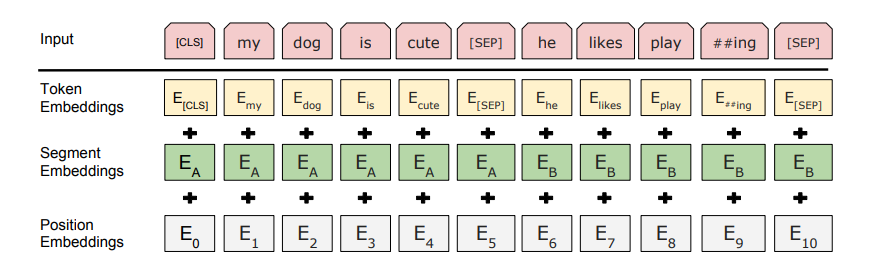

*Problem*: Given a movie review, predict whether it’s positive or negative

# 3. Syntactic processing

Syntactic analysis or parsing is defined as the process of analyzing the strings of symbols in natural language conforming to the rules of formal grammar. The purpose of this process is to draw exact meaning, or perform dictionary meaning from the text. Syntax analysis checks the text for meaningfulness comparing to the rules of formal grammar.

Example:
1. Delhi is the capital of India.
2. Is Delhi the of India capital.

Two sentences have the same word but only sentence 1 was meaningful and syntactically correct. The purpose of sytactic processing is recover the right one.

## 3.1. Part of speech (POS) tagging 

Part of speech is the process  which refers to categorizing words in a text (corpus) in correspondence with a particular part of speech, depending on the definition of the word and its context. To analyze the relationship and understanding meaning of text, pos tagging is very important process. POS tag are useful for building parse trees, which are used in building NERs and extracting relations between words. It is also use for building lemmatizers in 1.3 

Some pos tagging techniques:
- Lexical base method: Assigns the POS tag the most frequently occurring with a word in the training corpus
- Rule based method: Assigns POS tags based on rules in dictionary.
- Probabilistic method: This method assigns the POS tags based on the probability of a particular tag sequence occurring. Conditional Random Fields (CRFs) and Hidden Markov Models (HMMs) are probabilistic approaches to assign a POS Tag.
- Deep learning method: Recurrent Neural Networks can also be used for POS tagging.

### Conditional Random Fields (CRFs)

Conditional Random Fields are a discriminative model, used for predicting sequences. They use contextual information from previous labels, thus increasing the amount of information the model has to make a good prediction.
Discriminative classifier - they model the decision boundary between the different classes (just like logistic regression)

### Hidden Markov Models (HMMs)

## 3.2. Parsing
One of the most important parts of syntactic processing is parsing. It means to break down a given sentence into its *grammatical components*. 

NLTK doesn't support pre-trained English grammar model, we have to manually specify grammar before parsing a sentence.

In [18]:
import spacy
import pandas as pd
from spacy import displacy

In [38]:
nlp = spacy.load("en_core_web_sm")

sentence = 'I really like your shirt'
doc = nlp(sentence)

In [39]:
tokens=[]
relation=[]
head=[]
children=[]
for token in doc:
    tokens.append(token.text)
    relation.append(token.dep_)
    head.append(token.head.text)
    children.append([i for i in token.children])

In [40]:
result = pd.DataFrame({'token':token,
                       'relation':relation,
                       'head':head,
                       'children':children})

In [41]:
result

,token,relation,head,children
0,shirt,nsubj,like,[]
1,shirt,advmod,like,[]
2,shirt,ROOT,like,"[I, really, shirt]"
3,shirt,poss,shirt,[]
4,shirt,dobj,like,[your]


In [42]:
displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})

# 4. NLP for Vietnamese language 

With the Vietnamese language, the packages haven't developed completely and they don't have specific documentation. Some common packages are pyvi, vncorenlp and underthesea. These packages provide some basic function such as word tokenize, pos tagging and removing accent. There is no quite difference between pyvi and underthesea despite of some pre-trained models that underthesea provides like NER, classify and sentiment analysis

*Reference:* 
[Pyvi](https://pypi.org/project/pyvi/) and 
[Underthesea](https://underthesea.readthedocs.io/en/latest/readme.html)

In [4]:
from pyvi import ViTokenizer, ViPosTagger, ViUtils,ViDiac

In [5]:
ViTokenizer.tokenize("Hồ gươm là danh lam thắng cảnh Hà Nội").split(' ')

['Hồ', 'gươm', 'là', 'danh_lam', 'thắng_cảnh', 'Hà_Nội']

In [17]:
list_token, _ = ViTokenizer.spacy_tokenize("Tôi là sinh viên trường cao đẳng y tế hà tây")
list_token

['Tôi', 'là', 'sinh_viên', 'trường', 'cao_đẳng', 'y_tế', 'hà_tây']

In [7]:
ViPosTagger.postagging("Hồ gươm là danh lam thắng cảnh Hà Nội")

(['Hồ', 'gươm', 'là', 'danh', 'lam', 'thắng', 'cảnh', 'Hà', 'Nội'],
 ['N', 'N', 'V', 'N', 'N', 'V', 'N', 'Np', 'Np'])

In [8]:
ViUtils.remove_accents(u"Hồ gươm là danh lam thắng cảnh Hà Nội")

b'Ho guom la danh lam thang canh Ha Noi'

*Another way to remove accent is using unidecode packages*

In [45]:
import unidecode

unidecode.unidecode('Hồ gươm là danh lam thắng cảnh Hà Nội')

'Ho guom la danh lam thang canh Ha Noi'

In [12]:
import underthesea
from underthesea import sent_tokenize, word_tokenize, pos_tag

In [13]:
text = """Với xử lí tiếng việt, các thư viện chưa phát triển nhiều. Một số thư viện phổ biến là pyvi và underthesea"""
sent_tokenize(text)

['Với xử lí tiếng việt, các thư viện chưa phát triển nhiều.',
 'Một số thư viện phổ biến là pyvi và underthesea']

In [14]:
print(word_tokenize(text))

['Với', 'xử lí', 'tiếng', 'việt', ',', 'các', 'thư viện', 'chưa', 'phát triển', 'nhiều', '.', 'Một số', 'thư viện', 'phổ biến', 'là', 'pyvi', 'và', 'underthesea']


In [15]:
pos_tag(text)

[('Với', 'E'),
 ('xử lí', 'N'),
 ('tiếng', 'N'),
 ('việt', 'V'),
 (',', 'CH'),
 ('các', 'L'),
 ('thư viện', 'N'),
 ('chưa', 'R'),
 ('phát triển', 'V'),
 ('nhiều', 'A'),
 ('.', 'CH'),
 ('Một số', 'L'),
 ('thư viện', 'N'),
 ('phổ biến', 'V'),
 ('là', 'V'),
 ('pyvi', 'N'),
 ('và', 'C'),
 ('underthesea', 'M')]

---
*&#9829; By Quang Hung x Thuy Linh &#9829;*